# Logistic Regression

This notebook demonstrates the implementation of the logistic regression algorithm for classification. For details on the **implementation and mathematics** of logistic regression, see **this README**.

This notebook is separated into several sections, **which are listed below**.

### Library Imports
This section imports the libraries **and modules** required to run logistic regression. The **following dependencies are required**

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.supervised_learning.regression import *
from rice_ml.postprocess.classificationpost import *
import sklearn

### Data Loading & Cleaning
The data used in this notebook comes from **THIS IS NOT TRUEPalmer Penguins, a common toy dataset for evaluating classification algorithms due to its **clear-cut features/simplicity/not too large/other benefits**. **It has been chosen **because it is simple for classification** and requires several preprocessing steps, including **handling missing values**, which **showcase the preprocessing modules/package**. This dataset contains the following feature data for 344 penguins:
- Species: **fill this in, three species - 'Adelie' 'Chinstrap' 'Gentoo'**
- Island: **fill this in - 'Biscoe' 'Dream' 'Torgersen'**
- Bill Length (mm): continuous values, measuring bill length in millimeters
- Bill Depth (mm): continuous values, measuring bill depth in millimeters
- Flipper Length (mm): continuous values, measuring flipper length in millimeters
- Body Mass (g): continuous values, measuring body mass in grams
- Sex: **binary male/female**

**we drop some features** 
**This section covers the actual loading of the data; the data is loaded using `sns.load_dataset("penguins")`. Explanation here!! why those features?? encode using pandas uniques. Then cleaned using preprocessing - dropped missing values, identified outliers with z-scoring and dropped, dropped duplicates, z-scored the feature data for standardization**. This **notebook attempts to predict species. This section is copied in KNN as well, given that they use very similar algorithms. it's also used in decision tree**

'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'

In [98]:
cancer_data = sklearn.datasets.load_breast_cancer(as_frame = True)
cancer_data = cancer_data.frame
display(cancer_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


To ensure that the dataset does not contain missing data, we apply a series of preprocessing **algorithms**, including dropping any rows with missing values or that are identified to be duplicates of another.

In [99]:
cancer_data_missing = missing_data(cancer_data, 'drop')
cancer_data_cleaned = duplicate_identify(cancer_data_missing, True)

We then **split the data into the target variable and the other features**. The target variable for classification in this dataset is "target", which indicates the absence (0) or presence (1) of breast cancer.

In [100]:
cancer_features = cancer_data_cleaned[:, :-1]
cancer_status = cancer_data_cleaned[:, -1]
print(f"Array for features (first five entries, first five features): \n {cancer_features[0:5, 0:5]} \n \n \
Array for presence/absence of cancer (first five rows): \n {cancer_status[0:5]}")

Array for features (first five entries, first five features): 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]] 
 
 Array for presence/absence of cancer (first five rows): 
 [0. 0. 0. 0. 0.]


### Data Visualization

To better understand the **distribution of features** and their relation to the status of breast cancer, we can visualize the relationships between them using **both plots and a correlation matrix**. The correlation matrix indicates how closely correlated each pair of variables is, which aids in the decision of which to include in a logistic regression.

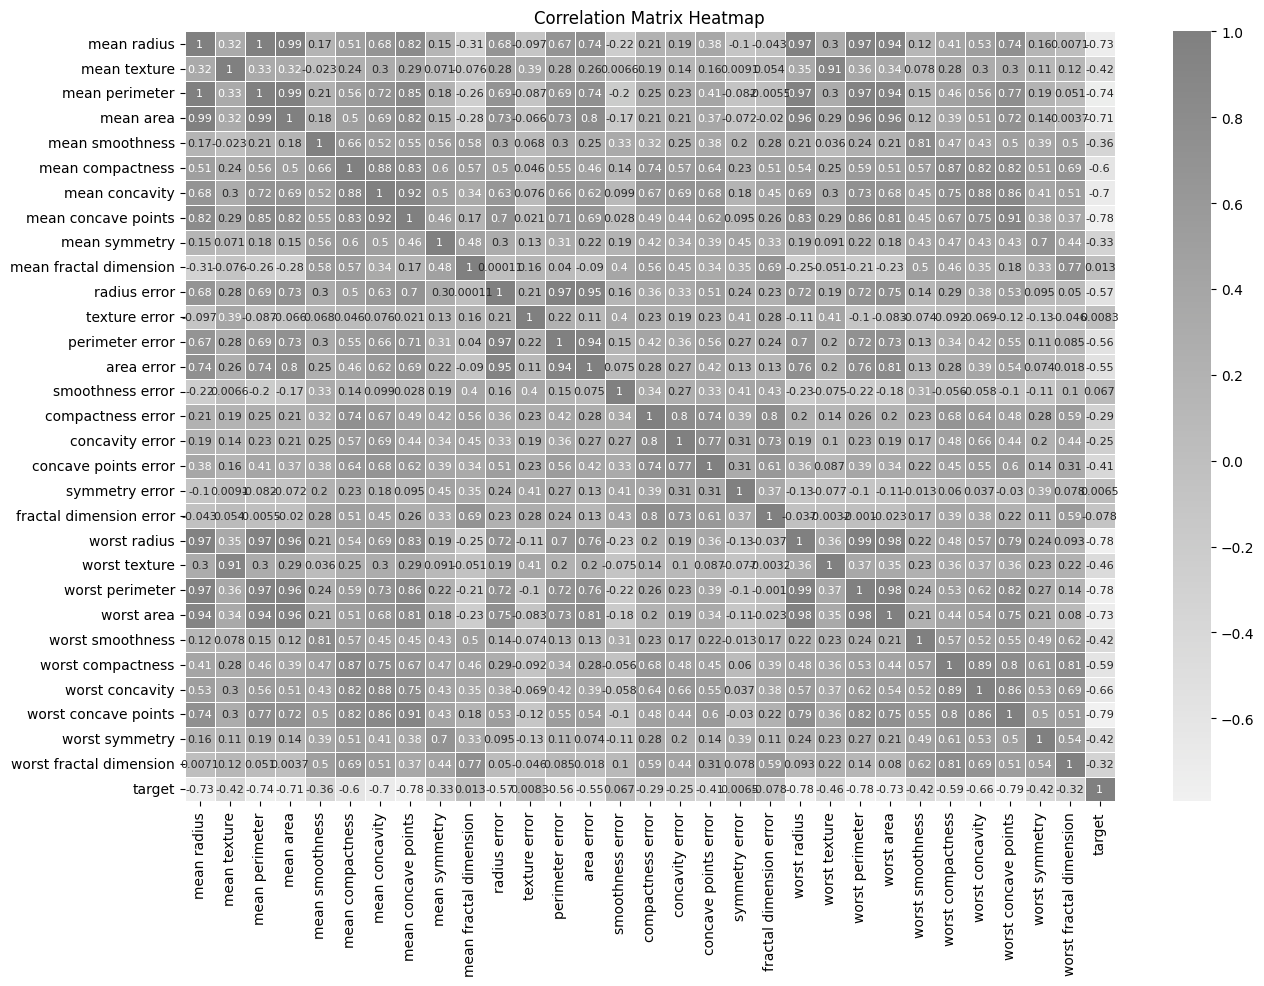

In [101]:
# Creating and plotting a correlation matrix with a heatmap
correlation_matrix = (pd.DataFrame(cancer_data_cleaned, columns = cancer_data.columns)).corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8}, cmap = sns.light_palette('gray', as_cmap=True), linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The target feature appears to be correlated with the mean radius and mean concavity. To be able to visualize **these features and their relationship to cancer,** we select these two as **entries in logistic regression**. Their relationship to the malignant/benign nature of **the tumor** can be **depicted** with a two-dimensional plot of radius and perimeter, with **cancer status** color-coded.

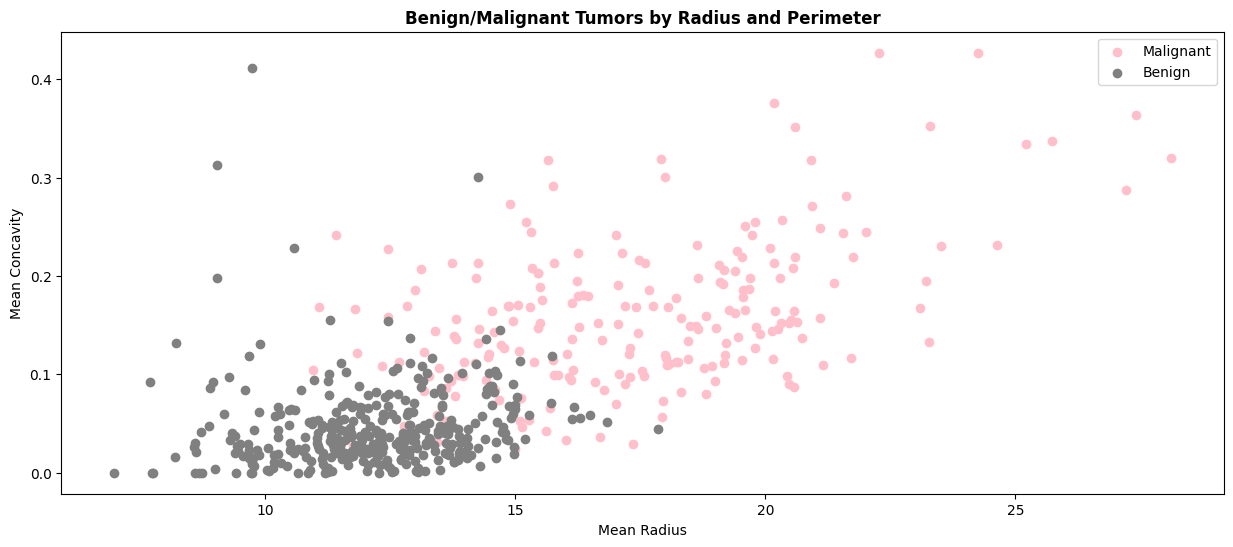

In [102]:
# Plotting mean radius and concavity, color-coded by target
colors = {0: 'pink', 1: 'gray', 2: '#CBC3E3'}

plt.figure(figsize = (15, 6))
for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    plt.scatter(cancer_features[mask, 0], cancer_features[mask, 6], label = cancer_status, color = colors[target])
    
plt.legend(['Malignant', 'Benign'])
plt.title("Benign/Malignant Tumors by Radius and Perimeter", fontweight = 'bold')
plt.xlabel("Mean Radius")
plt.ylabel("Mean Concavity")

plt.show()

### Logistic Regression Implementation (2 Features)

This section **implements a basic logistic regression algorithm for the two identified features to attempt to classify benign/malignant tumors**. **elaborate!!** 

**To avoid skewing results with different feature values**, we standardize the feature data **by calculating zscores** using the `z_score_standardize` **module** from the preprocessing package. This ensures that **no feature dominates/overrides the other ones** by **making them all the same scale**. The z-score equation used is **this!!**

In [103]:
# Standardizing the data
cancer_data_normal = z_score_standardize(cancer_features[:, [0, 6]])
print(f"Standardized feature data (first five rows): \n {cancer_data_normal[0:5, :]}")

Standardized feature data (first five rows): 
 [[ 1.09706398  2.65287398]
 [ 1.82982061 -0.02384586]
 [ 1.57988811  1.36347845]
 [-0.76890929  1.91589718]
 [ 1.75029663  1.37101143]]


Once the data has been scaled, it is split into testing and training arrays. This ensures that the model is not trained and tested on the same set of data, allowing for unbiased evaluation of model performance and preventing overfitting. **stratification/0.3 test_array size**. There are **this many samples - fill this in!!**

In [104]:
# Splitting the data into training and testing arrays
train_array, test_array, train_targets, test_targets = train_test(cancer_data_normal, cancer_status, stratify = cancer_status)

# Verifying sizes of each array
print(f"Shape of training array: {train_array.shape}")
print(f"Shape of training targets: {train_targets.shape}")
print(f"Shape of testing array: {test_array.shape}")
print(f"Shape of testing targets: {test_targets.shape}")

Shape of training array: (398, 2)
Shape of training targets: (398,)
Shape of testing array: (171, 2)
Shape of testing targets: (171,)


We then **initialize and fit the logistic regression model - elaborate**

In [105]:
# Fitting the model
reg = logistic_regression()
reg.fit(train_array, train_targets)

# Predicting the benign/malignant status of testing data
prediction = reg.prediction(test_array)
probs = reg.predict_proba(test_array)

**When the model has been successfully called/fit, we calculate a variety of postprocessing/accuracy/scoring metrics using the postprocessing package**. These include **accuracy, a visualization of the confusion matrix, and precision/recall/f1 scores for each one**. **fix this!! plot with the scores**. The **plot below shows the classification for the test cases plotted against the correct labels for the entire dataset; the rightmost plot contains the same plots/labels, but with the incorrectly classified points labeled in yellow.**

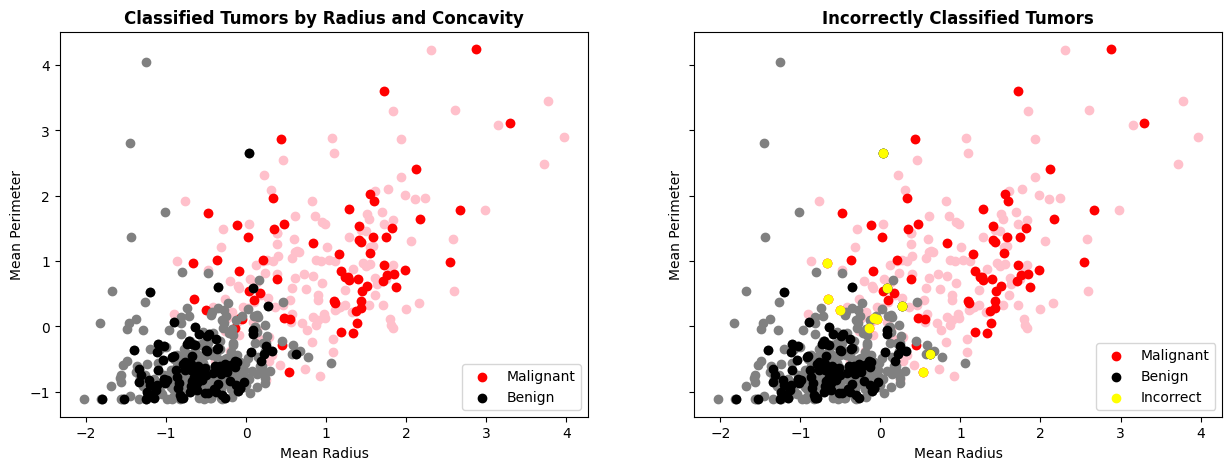

In [106]:
# Plotting mean radius and concavity for correct and predicted values, color-coded by target
colors = {0: 'pink', 1: 'gray', 2: '#CBC3E3'}
colors_2 = {0: 'red', 1: 'black'}

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    ax[0].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    ax[1].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    mask_new = (test_targets == target)
    ax[0].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])
    ax[1].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])

mask_incorrect = (test_targets != prediction)
ax[1].scatter(test_array[mask_incorrect, 0], test_array[mask_incorrect, 1], label = target, color = 'yellow')

ax[0].set_title("Classified Tumors by Radius and Concavity", fontweight = 'bold')
ax[1].set_title("Incorrectly Classified Tumors", fontweight = 'bold')

for i in range(2):
    ax[i].set_xlabel("Mean Radius")
    ax[i].set_ylabel("Mean Perimeter")

handles, labels = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in [1, 3]]
selected_handles_2 = [handles[i] for i in [1, 3, 4]]
ax[0].legend(handles = selected_handles, labels = ['Malignant', 'Benign'])
ax[1].legend(handles = selected_handles_2, labels = ['Malignant', 'Benign', 'Incorrect'])

plt.show()

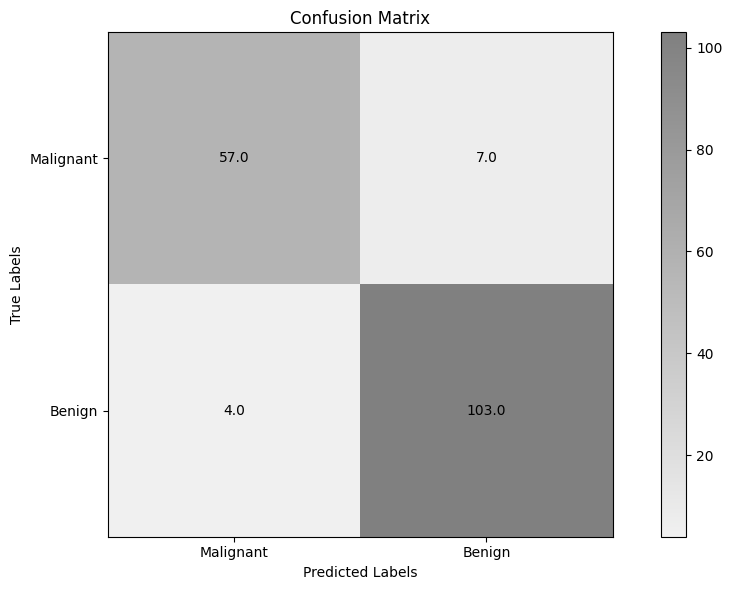

In [107]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(prediction, test_targets, conf_matrix_labels = ['Malignant', 'Benign'])

In [108]:
# Evaluating model performance on various metrics
print_model_metrics(prediction, test_targets)
print(f"AUC: {roc_auc(probs, test_targets):.2f}")

Model Metrics 
------------- 
Accuracy: 0.94 
Precision (Micro): 0.94 
Precision (Macro): 0.94 
Recall (Micro): 0.94 
Recall (Macro): 0.93 
F1 (Micro): 0.94 
F1 (Macro): 0.93
AUC: 0.98


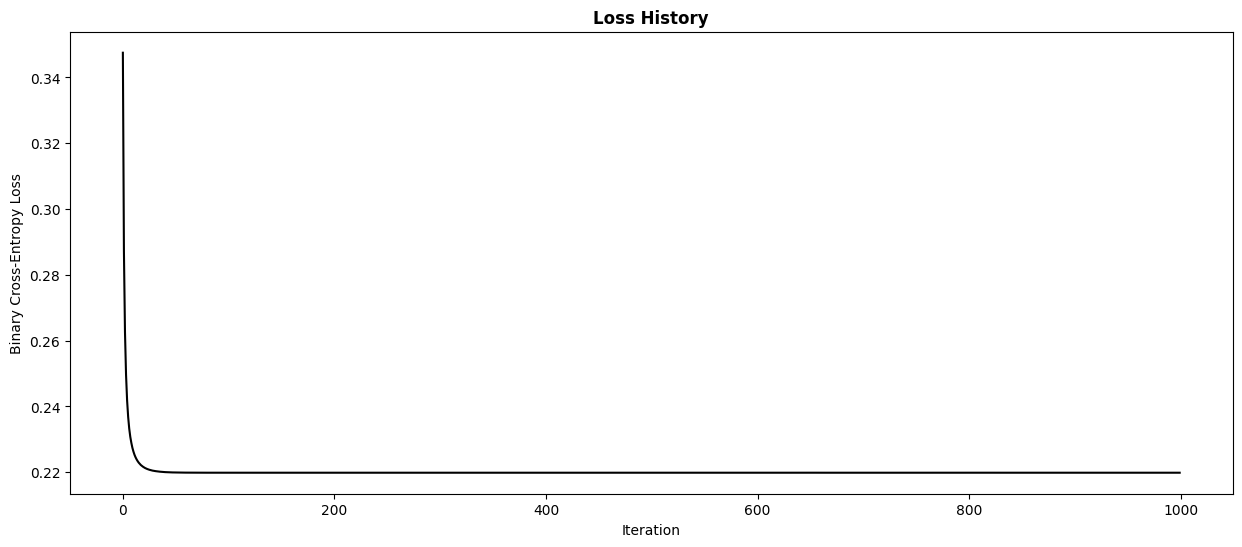

In [109]:
# Plotting the loss history
loss = reg.loss_
iteration = np.arange(len(loss))
plt.figure(figsize = (15, 6))
plt.plot(iteration, loss, 'black')
plt.title("Loss History", fontweight = 'bold')
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

**TODO - interpretation**

### Logistic Regression Implementation (Changing Parameters)

This section **implements a basic logistic regression algorithm for the two identified features to attempt to classify tumors**, but **with different metrics - elaborate!!**

In [110]:
# Arrays for maximum epochs and accuracy
epoch_values = np.arange(1, 1050, 50)
accuracy_values_epochs = np.full(len(epoch_values), np.nan)

# Fitting and scoring the model for each set of epochs
for i in range(len(epoch_values)):
    reg = logistic_regression(epochs = int(epoch_values[i]))
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    accuracy = accuracy_score(prediction, test_targets)
    accuracy_values_epochs[i] = accuracy

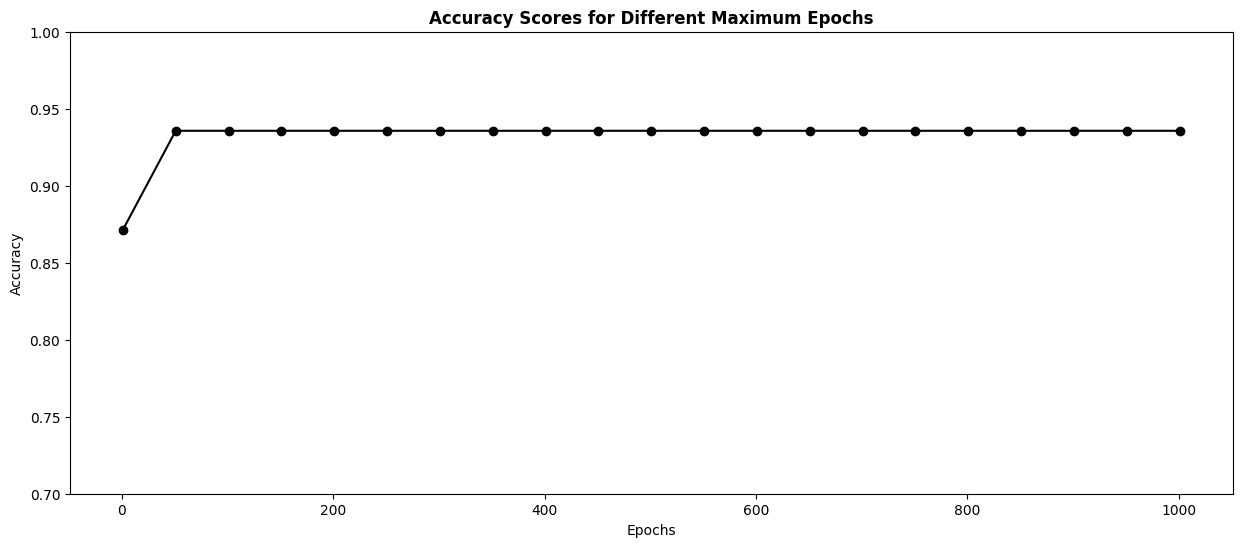

In [111]:
# Plotting the change in accuracy across different maximum epochs
plt.figure(figsize = (15, 6))
plt.plot(epoch_values, accuracy_values_epochs, 'black')
plt.scatter(epoch_values, accuracy_values_epochs, color = 'black')
plt.title("Accuracy Scores for Different Maximum Epochs", fontweight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()

**interpretation - can use only 100 epochs**

In [112]:
# Arrays for learning rate and accuracy
learning_rate_values = np.linspace(0.001, 0.50, 20)
accuracy_values_learning_rate = np.full(len(learning_rate_values), np.nan)

# Fitting and scoring the model for each learning rate
for i in range(len(learning_rate_values)):
    reg = logistic_regression(epochs = 100, learning_rate = learning_rate_values[i])
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    accuracy = accuracy_score(prediction, test_targets)
    accuracy_values_learning_rate[i] = accuracy

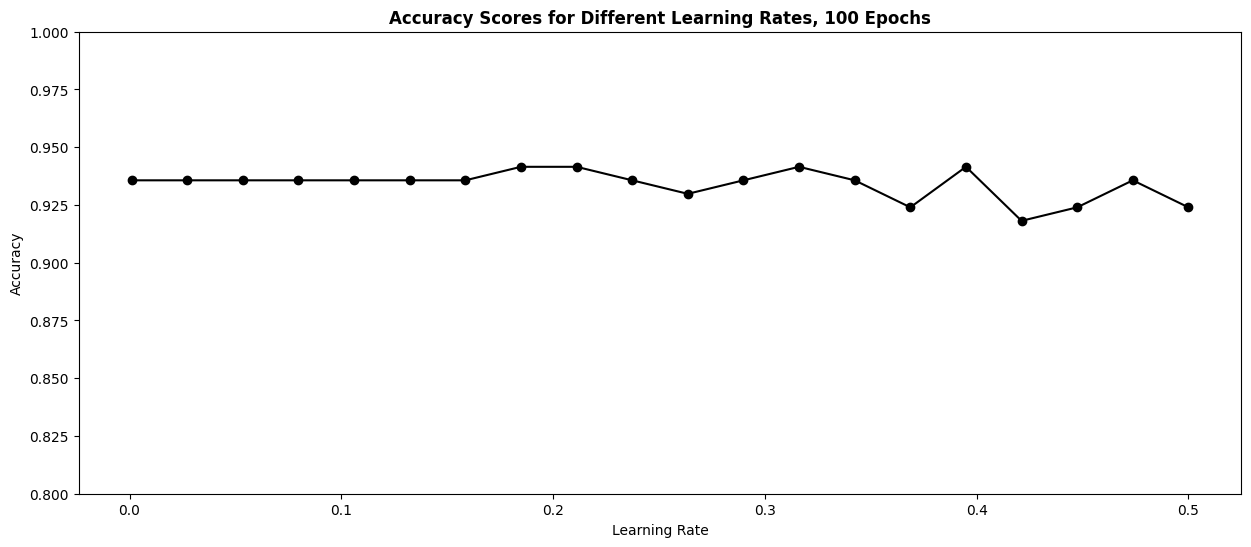

In [113]:
# Plotting the change in accuracy across different learning rates
plt.figure(figsize = (15, 6))
plt.plot(learning_rate_values, accuracy_values_learning_rate, 'black')
plt.scatter(learning_rate_values, accuracy_values_learning_rate, color = 'black')
plt.title("Accuracy Scores for Different Learning Rates, 100 Epochs", fontweight = 'bold')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.show()

**interpretation!!**

### Logistic Regression Implementation (Multiple Features)

**this section implements logistic regression in the same way using multiple features to see if it improves model accuracy/works**. As before, we begin by standardizing all features and splitting the data into training and test sets, then **initializing/fitting a model**

In [114]:
# Standardizing the data
cancer_data_normal_mult = z_score_standardize(cancer_features)
print(f"Standardized feature data (first five rows, first five features): \n {cancer_data_normal_mult[0:5, 0:5]}")

Standardized feature data (first five rows, first five features): 
 [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [115]:
# Splitting the data into training and testing arrays
train_array_mult, test_array_mult, train_targets_mult, test_targets_mult = train_test(cancer_data_normal_mult, cancer_status, stratify = cancer_status)

# Verifying sizes of each array
print(f"Shape of training array: {train_array_mult.shape}")
print(f"Shape of training targets: {train_targets_mult.shape}")
print(f"Shape of testing array: {test_array_mult.shape}")
print(f"Shape of testing targets: {test_targets_mult.shape}")

Shape of training array: (398, 30)
Shape of training targets: (398,)
Shape of testing array: (171, 30)
Shape of testing targets: (171,)


In [116]:
# Fitting the model
reg_mult = logistic_regression(epochs = 100)
reg_mult.fit(train_array_mult, train_targets_mult)

# Predicting tumor type based on testing data
prediction_mult = reg_mult.prediction(test_array_mult)
probs_mult = reg_mult.predict_proba(test_array_mult)

**We then evaluate across various performance metrics - finish!!**.

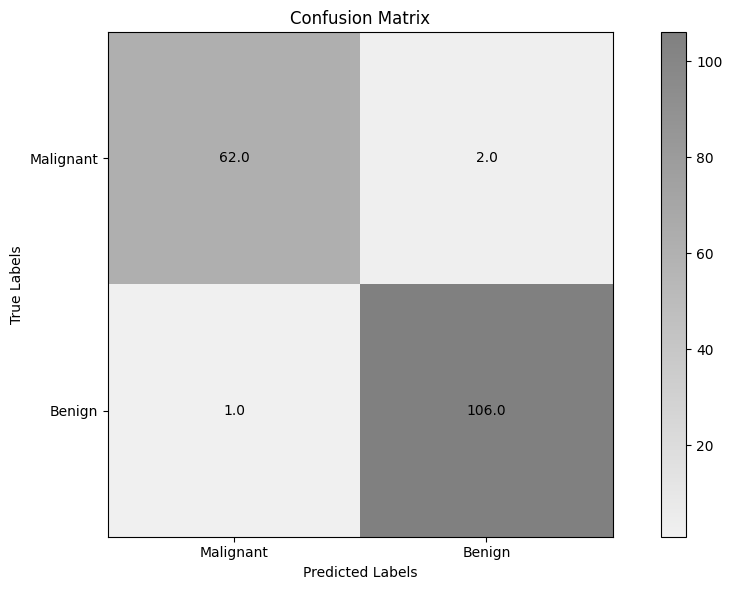

In [117]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(prediction_mult, test_targets_mult, conf_matrix_labels = ['Malignant', 'Benign'])

In [118]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_mult, test_targets_mult)
print(f"AUC: {roc_auc(probs_mult, test_targets_mult):.2f}")

Model Metrics 
------------- 
Accuracy: 0.98 
Precision (Micro): 0.98 
Precision (Macro): 0.98 
Recall (Micro): 0.98 
Recall (Macro): 0.98 
F1 (Micro): 0.98 
F1 (Macro): 0.98
AUC: 1.00


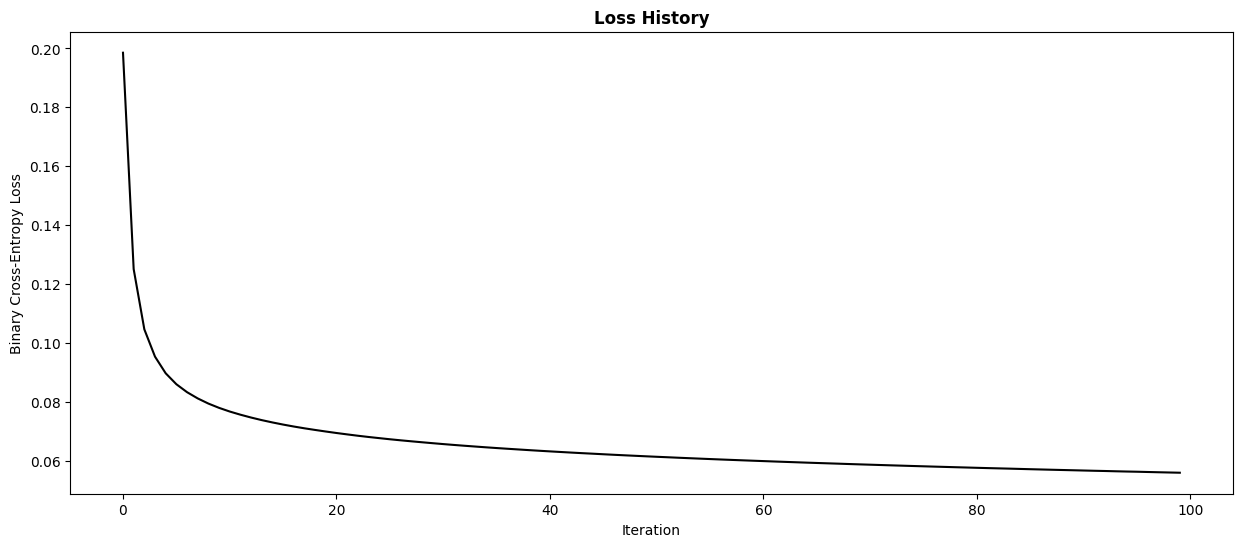

In [119]:
# Plotting the loss history
loss = reg_mult.loss_
iteration = np.arange(len(loss))
plt.figure(figsize = (15, 6))
plt.plot(iteration, loss, 'black')
plt.title("Loss History", fontweight = 'bold')
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

**interpretation - using all the features results in a significantly better prediction accuracy**

### Comparison with Existing Models

**finish this!! scikit learn**

In [120]:
from sklearn.linear_model import LogisticRegression
reg_sk = LogisticRegression(max_iter = 100)
reg_sk.fit(train_array_mult, train_targets_mult)
prediction_sk = reg_sk.predict(test_array_mult)
probs_sk = reg_sk.predict_proba(test_array_mult)

In [121]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_sk, test_targets_mult)
print(f"AUC: {roc_auc(probs_sk[:, 1], test_targets_mult):.2f}")

Model Metrics 
------------- 
Accuracy: 0.98 
Precision (Micro): 0.98 
Precision (Macro): 0.99 
Recall (Micro): 0.98 
Recall (Macro): 0.98 
F1 (Micro): 0.98 
F1 (Macro): 0.98
AUC: 1.00


**interpretation - fairly similar to this class**